In [2]:
import os
import pandas as pd
import numpy as np
import random
import logging
from utils import extract_feature, get_audio_config, AVAILABLE_EMOTIONS
from data_extractor import load_data
from create_csv import write_emodb_csv, write_tess_ravdess_csv, write_custom_csv
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [ ]:
csv_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//csv_files"

# List CSV files
print("CSV Files Found:", os.listdir(csv_path))

# Load the train dataset
df_train = pd.read_csv(os.path.join(csv_path, "train_emodb.csv"))
print(df_train.head())

print(df_train.isnull().sum())


CSV Files Found: ['test_custom.csv', 'test_emodb.csv', 'test_tess_ravdess.csv', 'train_custom.csv', 'train_emodb.csv', 'train_tess_ravdess.csv']
                                                path  emotion
0  C://Users//visha//Downloads//emotion-recogniti...    happy
1  C://Users//visha//Downloads//emotion-recogniti...  neutral
2  C://Users//visha//Downloads//emotion-recogniti...    angry
3  C://Users//visha//Downloads//emotion-recogniti...    happy
4  C://Users//visha//Downloads//emotion-recogniti...  neutral
path       0
emotion    0
dtype: int64


In [11]:
import os

features_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//features"

# List all feature files
feature_files = os.listdir(features_path)
print(f"📌 Total feature files found: {len(feature_files)}")
print(f"📌 Sample feature files: {feature_files[:5]}")  # Show first 5


📌 Total feature files found: 2
📌 Sample feature files: ['test_mfcc-chroma-mel_ABCDFHNPS_1002.npy', 'train_mfcc-chroma-mel_ABCDFHNPS_5385.npy']


In [12]:
import numpy as np

# Load a sample feature file
sample_file = os.path.join(features_path, feature_files[0])  # Pick the first file
features = np.load(sample_file)

print(f"✅ Feature shape: {features.shape}")
print(f"✅ First few feature values:\n{features[:10]}")


✅ Feature shape: (1002, 180)
✅ First few feature values:
[[-2.34828918e+02  8.63384552e+01  5.10774517e+00 ...  1.01142013e-02
   4.28017415e-03  2.61196098e-03]
 [-2.11208389e+02  7.76294861e+01  5.82648468e+00 ...  6.42562052e-03
   3.77886556e-03  2.32989457e-03]
 [-1.83999680e+02  2.80080948e+01 -2.51207581e+01 ...  7.61826802e-03
   4.02457919e-03  2.26675719e-03]
 ...
 [-1.73714111e+02  7.10036774e+01  1.42898540e+01 ...  1.91421267e-02
   1.05606839e-02  5.49915247e-03]
 [-1.61346939e+02  8.28452530e+01  1.34468393e+01 ...  2.62338072e-02
   1.81395914e-02  1.02709876e-02]
 [-1.28739044e+02  2.90313339e+01  1.43906870e+01 ...  2.90725559e-01
   1.18613511e-01  6.68447018e-02]]


In [13]:
feature_shapes = [np.load(os.path.join(features_path, f)).shape for f in feature_files]
unique_shapes = set(feature_shapes)

print(f"📌 Unique feature shapes: {unique_shapes}")


📌 Unique feature shapes: {(5385, 180), (1002, 180)}


In [14]:
import pandas as pd

csv_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//csv_files/train_tess_ravdess.csv"
df = pd.read_csv(csv_path)

print(f"📌 Total Samples in CSV: {len(df)}")
print(f"📌 Total Feature Files: {len(feature_files)}")


📌 Total Samples in CSV: 4858
📌 Total Feature Files: 2


In [15]:
print("📌 Unique Emotions in Training Data:", set(y_train))
print("📌 Unique Emotions in CSV Files:", set(df_train_tess_ravdess["emotion"].unique()))


📌 Unique Emotions in Training Data: {'sad', 'happy', 'fear', 'angry', 'neutral', 'ps', 'disgust', 'boredom'}
📌 Unique Emotions in CSV Files: {'sad', 'ps', 'fear', 'happy', 'neutral', 'disgust', 'angry'}


In [ ]:
import numpy as np
import pandas as pd

# Define feature file paths
train_features_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//features//train_mfcc-chroma-mel_ACDFHNPS_5385.npy"
test_features_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//features//test_mfcc-chroma-mel_ACDFHNPS_1002.npy"

# Load the features
X_train = np.load(train_features_path)
X_test = np.load(test_features_path)

print(f" Loaded Training Features: {X_train.shape}")  # Should be (5385, 180)
print(f" Loaded Testing Features: {X_test.shape}")    # Should be (1002, 180)



✅ Loaded Training Features: (5385, 180)
✅ Loaded Testing Features: (1002, 180)


In [ ]:
csv_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//csv_files"

# Load training CSVs
df_train_emodb = pd.read_csv(os.path.join(csv_path, "train_emodb.csv"))
df_train_tess_ravdess = pd.read_csv(os.path.join(csv_path, "train_tess_ravdess.csv"))
df_train_custom = pd.read_csv(os.path.join(csv_path, "train_custom.csv"))

# Load testing CSVs
df_test_emodb = pd.read_csv(os.path.join(csv_path, "test_emodb.csv"))
df_test_tess_ravdess = pd.read_csv(os.path.join(csv_path, "test_tess_ravdess.csv"))
df_test_custom = pd.read_csv(os.path.join(csv_path, "test_custom.csv"))

# Count total samples in CSV
total_train_csv = len(df_train_emodb) + len(df_train_tess_ravdess) + len(df_train_custom)
total_test_csv = len(df_test_emodb) + len(df_test_tess_ravdess) + len(df_test_custom)

print(f"Total Samples in CSV (Train): {total_train_csv}")
print(f" Total Samples in CSV (Test): {total_test_csv}")



📌 Total Samples in CSV (Train): 5385
📌 Total Samples in CSV (Test): 1002


In [25]:
print(f"✅ Loaded Features vs CSV Samples Match: {len(X_train) == total_train_csv}")
print(f"✅ Loaded Test Features vs CSV Samples Match: {len(X_test) == total_test_csv}")


✅ Loaded Features vs CSV Samples Match: True
✅ Loaded Test Features vs CSV Samples Match: True


In [32]:
import numpy as np

# Define feature file paths
train_features_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//features//train_mfcc-chroma-mel_ACDFHNPS_5385.npy"
test_features_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//features//test_mfcc-chroma-mel_ACDFHNPS_1002.npy"
# Load features
X_train = np.load(train_features_path)
X_test = np.load(test_features_path)

print(f"✅ Loaded Training Features Shape: {X_train.shape}")  # Expected (5385, 180)
print(f"✅ Loaded Testing Features Shape: {X_test.shape}")    # Expected (1002, 180)


✅ Loaded Training Features Shape: (5385, 180)
✅ Loaded Testing Features Shape: (1002, 180)


In [ ]:
import pandas as pd

# CSV file paths
csv_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//csv_files"

# Load training CSVs
df_train_emodb = pd.read_csv(os.path.join(csv_path, "train_emodb.csv"))
df_train_tess_ravdess = pd.read_csv(os.path.join(csv_path, "train_tess_ravdess.csv"))
df_train_custom = pd.read_csv(os.path.join(csv_path, "train_custom.csv"))

# Load testing CSVs
df_test_emodb = pd.read_csv(os.path.join(csv_path, "test_emodb.csv"))
df_test_tess_ravdess = pd.read_csv(os.path.join(csv_path, "test_tess_ravdess.csv"))
df_test_custom = pd.read_csv(os.path.join(csv_path, "test_custom.csv"))

# Combine labels
y_train = pd.concat([df_train_emodb["emotion"], df_train_tess_ravdess["emotion"], df_train_custom["emotion"]], ignore_index=True).values
y_test = pd.concat([df_test_emodb["emotion"], df_test_tess_ravdess["emotion"], df_test_custom["emotion"]], ignore_index=True).values

print(f"✅ Total Training Labels Loaded: {len(y_train)} (Expected: 5385)")
print(f"✅ Total Testing Labels Loaded: {len(y_test)} (Expected: 1002)")



✅ Total Training Labels Loaded: 5385 (Expected: 5385)
✅ Total Testing Labels Loaded: 1002 (Expected: 1002)


In [34]:
if len(X_train) == len(y_train) and len(X_test) == len(y_test):
    print("✅ Data is correctly aligned: Features and Labels Match!")
else:
    print(" Mismatch Detected! Check CSV and Features.")


✅ Data is correctly aligned: Features and Labels Match!


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")


✅ Model Accuracy: 76.95%


In [53]:
import joblib

model_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//MODELS//randomforestclassifier_emotion_model.pkl"
joblib.dump(model_RandomForestClassifier, model_path)

print(f"Model saved successfully at: {model_path}")

Model saved successfully at: C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//MODELS//randomforestclassifier_emotion_model.pkl


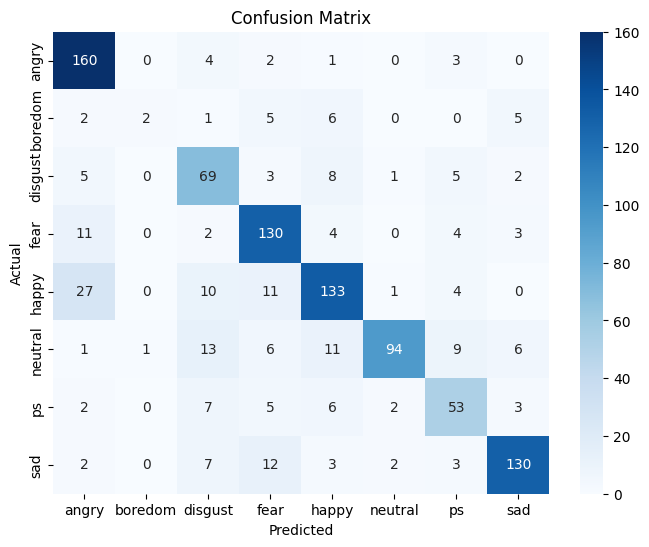

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Try SVM (Support Vector Machine)
model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print(f"✅ SVM Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")

# Try Gradient Boosting
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
print(f"✅ Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb) * 100:.2f}%")


✅ SVM Accuracy: 52.89%
✅ Gradient Boosting Accuracy: 76.45%


In [40]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("✅ Label Encoding Mapping:", label_mapping)




✅ Label Encoding Mapping: {'angry': 0, 'boredom': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'ps': 6, 'sad': 7}


In [43]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train_encoded)

y_pred_xgb = model_xgb.predict(X_test)

y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"✅ XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")



✅ XGBoost Accuracy: 78.84%


In [54]:
import joblib

model_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//MODELS//xgboost_emotion_model.pkl"
joblib.dump(model_xgb, model_path)

print(f"Model saved successfully at: {model_path}")

Model saved successfully at: C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//MODELS//xgboost_emotion_model.pkl


In [44]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(verbose=0)
model_cat.fit(X_train, y_train)

y_pred_cat = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"✅ CatBoost Accuracy: {accuracy_cat * 100:.2f}%")


✅ CatBoost Accuracy: 79.74%



✅ Classification Report:
               precision    recall  f1-score   support

       angry       0.82      0.95      0.88       170
     boredom       0.80      0.19      0.31        21
     disgust       0.61      0.72      0.66        93
        fear       0.86      0.81      0.83       154
       happy       0.75      0.81      0.78       186
     neutral       0.93      0.71      0.81       141
          ps       0.66      0.85      0.74        78
         sad       0.91      0.80      0.85       159

    accuracy                           0.80      1002
   macro avg       0.79      0.73      0.73      1002
weighted avg       0.81      0.80      0.80      1002



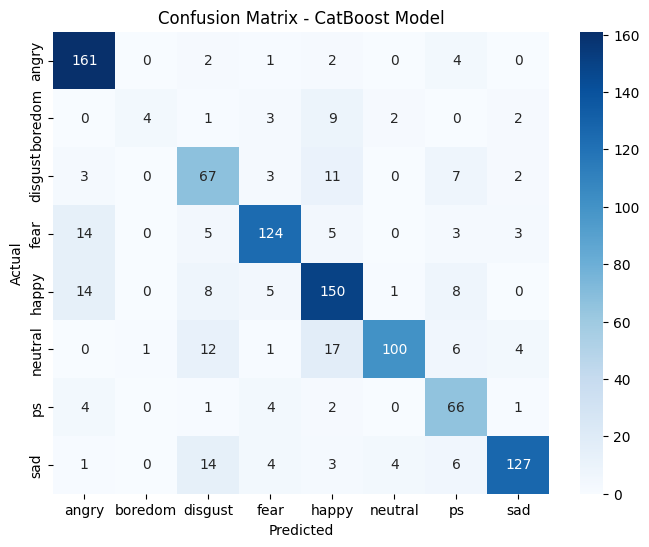

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_cat))

cm = confusion_matrix(y_test, y_pred_cat, labels=model_cat.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model_cat.classes_, yticklabels=model_cat.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Model")
plt.show()


In [49]:
from utils import extract_feature, get_audio_config

new_audio_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//converted_data//training//Actor_01//01_01_01_01_dogs-sitting_fear.wav"
#"C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//converted_data//test-custom//soumaya2_happy.wav"

new_audio_features = extract_feature(new_audio_path, **get_audio_config(["mfcc", "chroma", "mel"])).reshape(1, -1)

predicted_emotion = model_cat.predict(new_audio_features)
print(f"🎙️ Predicted Emotion: {predicted_emotion[0]}")

🎙️ Predicted Emotion: ['fear']


In [50]:
import joblib

model_path = "C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//MODELS//catboost_emotion_model.pkl"
joblib.dump(model_cat, model_path)

print(f"Model saved successfully at: {model_path}")

Model saved successfully at: C://Users//visha//Downloads//emotion-recognition-using-speech-master//emotion-recognition-using-speech-master//MODELS//catboost_emotion_model.pkl


In [51]:
loaded_model = joblib.load(model_path)
print("✅ Model loaded successfully!")


✅ Model loaded successfully!
